In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('greater_boston.csv')
df.head()

,householdID,total_ppl,own_rent,square_foot,household_income,number_pets,region,entertainment_spend_est,travel_spend_est,under_12,LL_passholder
0,1,1.0,own,3309,82050.03,1,South Shore,3189.11,3083.41,1.0,Yes
1,2,1.0,own,3814,83077.81,2,MetroWest,4175.35,4713.28,1.0,Yes
2,3,2.0,rent,2592,91401.41,2,North Shore,1814.98,3479.07,2.0,No
3,4,1.0,own,2628,73048.55,1,Middlesex,1945.14,3842.42,1.0,No
4,5,1.0,rent,2442,89145.36,2,Suffolk,4410.86,1913.28,1.0,Yes


In [3]:
df.describe()

,householdID,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est,under_12
count,15000.000000,14925.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,14925.000000
mean,7500.500000,1.580570,3118.928600,84659.802060,1.509200,3451.736870,3943.419994,1.580570
std,4330.271354,0.815143,815.925967,25756.481173,0.790163,1229.005744,744.658639,0.815143
min,1.000000,0.000000,370.000000,-3078.560000,0.000000,-283.350000,1037.610000,0.000000
25%,3750.750000,1.000000,2506.000000,66787.702500,1.000000,2593.902500,3455.965000,1.000000
50%,7500.500000,2.000000,3042.000000,84303.245000,2.000000,3390.650000,3959.620000,2.000000
75%,11250.250000,2.000000,3738.000000,102643.917500,2.000000,4279.240000,4441.960000,2.000000
max,15000.000000,4.000000,6081.000000,171989.560000,4.000000,7942.620000,7014.070000,4.000000


### Data Exploration

In [4]:
df.corr()

,householdID,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est,under_12
householdID,1.000000,-0.003450,-0.000748,-0.001695,-0.000532,0.011833,-0.009327,-0.003450
total_ppl,-0.003450,1.000000,0.008347,-0.099323,0.008735,-0.052777,-0.054661,1.000000
square_foot,-0.000748,0.008347,1.000000,0.040118,0.004817,0.024716,0.270575,0.008347
household_income,-0.001695,-0.099323,0.040118,1.000000,-0.007270,0.458255,0.304087,-0.099323
number_pets,-0.000532,0.008735,0.004817,-0.007270,1.000000,-0.008985,-0.005792,0.008735
entertainment_spend_est,0.011833,-0.052777,0.024716,0.458255,-0.008985,1.000000,0.275295,-0.052777
travel_spend_est,-0.009327,-0.054661,0.270575,0.304087,-0.005792,0.275295,1.000000,-0.054661
under_12,-0.003450,1.000000,0.008347,-0.099323,0.008735,-0.052777,-0.054661,1.000000


total_ppl and under_12 columns have a perfect correlation, suggesting that both the columns are the same. From describe(), we see that total_ppl/under_12 ranges from 0 to 4. These values look reasonable for the under_12 variables as it denotes the number of members of the household who are less than 12 years old. However, these values don't look reasonable for total_ppl since it violates our assumption of atleast one person living in a household. 

As a result, we are dropping the total_ppl column.

householdID columns is also dropped as it is an arbitarary id assigned to each house and provides us no valuable information regarding the houshold itself.

In [5]:
# dropping total_ppl, householdID
df2 = df.drop(['total_ppl', 'householdID'], axis=1)

In [6]:
df2.head()

,own_rent,square_foot,household_income,number_pets,region,entertainment_spend_est,travel_spend_est,under_12,LL_passholder
0,own,3309,82050.03,1,South Shore,3189.11,3083.41,1.0,Yes
1,own,3814,83077.81,2,MetroWest,4175.35,4713.28,1.0,Yes
2,rent,2592,91401.41,2,North Shore,1814.98,3479.07,2.0,No
3,own,2628,73048.55,1,Middlesex,1945.14,3842.42,1.0,No
4,rent,2442,89145.36,2,Suffolk,4410.86,1913.28,1.0,Yes


In [7]:
# negative household income
df2.loc[df2['household_income']<0]

,own_rent,square_foot,household_income,number_pets,region,entertainment_spend_est,travel_spend_est,under_12,LL_passholder
9814,rent,4151,-1081.33,0,North Shore,2910.55,2709.15,2.0,No
10334,own,3762,-3078.56,1,North Shore,3604.53,3867.91,1.0,No


We noticed negative values for the household_income variable and explored further. We have decided to keep these rows in since it could be the result of the household owing taxes to the IRS in the year that the sample was taken (a negative value here would indicate that the back taxes owed exceeded income earned during that year).

In [8]:
# negative entertainment expenditure
df2.loc[df2['entertainment_spend_est']<0]

,own_rent,square_foot,household_income,number_pets,region,entertainment_spend_est,travel_spend_est,under_12,LL_passholder
1172,own,3836,43425.55,1,North Shore,-250.51,3898.34,1.0,Yes
2429,own,1418,26807.16,1,North Shore,-178.27,2350.52,3.0,No
3604,own,4195,48287.63,2,North Shore,-283.35,2949.70,1.0,No
6051,own,2919,37170.35,2,North Shore,-145.31,4077.73,1.0,No
7877,own,3353,40433.97,2,North Shore,-249.66,3010.99,1.0,No
9585,own,3021,127178.39,1,Middlesex,-65.82,4290.07,2.0,No
10464,own,1837,67252.29,2,North Shore,-187.20,3352.66,1.0,No
13155,rent,3866,58623.34,1,Middlesex,-55.75,4724.32,2.0,Yes
14228,own,4243,92902.65,2,North Shore,-55.96,2740.81,2.0,No


We noticed negative values for the entertainment_spend_set variable and explored further. We have decided to remove these 9 rows as they seem to be entered erroneously. They are not on par with travel spending and household income.

In [9]:
# removing rows with negative entertainment spending
df2 = df2.loc[df2['entertainment_spend_est']>0].reset_index(drop=True)

In [10]:
# these people are spending more than they have
df2.loc[df2['household_income']<df2['entertainment_spend_est'] + 
        df2['entertainment_spend_est']]

,own_rent,square_foot,household_income,number_pets,region,entertainment_spend_est,travel_spend_est,under_12,LL_passholder
3512,rent,3096,3614.34,2,North Shore,2788.10,3151.71,2.0,No
7856,own,1532,4413.31,0,North Shore,2424.02,2959.33,2.0,No
9808,rent,4151,-1081.33,0,North Shore,2910.55,2709.15,2.0,No
9958,own,2415,4699.69,1,North Shore,3706.79,3612.05,2.0,No
10328,own,3762,-3078.56,1,North Shore,3604.53,3867.91,1.0,No
11872,own,2699,1363.23,1,North Shore,2295.61,3688.56,2.0,No
14622,own,1893,2495.91,1,North Shore,1362.28,1980.09,1.0,Yes


There are 7 rows where people are spending more than they make. We are keeping these rows as households could have credit card debt etc.

### Missing Values

In [11]:
# checking for missing values
df2.isna().sum()

own_rent                    0
square_foot                 0
household_income            0
number_pets                 0
region                      0
entertainment_spend_est     0
travel_spend_est            0
under_12                   75
LL_passholder               0
dtype: int64

In [12]:
# median imputation
df2['under_12'].fillna((df2['under_12'].median()), inplace=True)

Using median imputation to fill in 75 missing values in under_12 column. Median value for under_12 is 2.

### Scaling the numeric variables

In [13]:
numeric_cols = ['square_foot', 'household_income', 
                'number_pets', 'entertainment_spend_est', 
                'travel_spend_est', 'under_12']

In [14]:
clustering_df = df2[numeric_cols]
clustering_df.head()

,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est,under_12
0,3309,82050.03,1,3189.11,3083.41,1.0
1,3814,83077.81,2,4175.35,4713.28,1.0
2,2592,91401.41,2,1814.98,3479.07,2.0
3,2628,73048.55,1,1945.14,3842.42,1.0
4,2442,89145.36,2,4410.86,1913.28,1.0


In [15]:
clustering_df.describe()

,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est,under_12
count,14991.000000,14991.000000,14991.000000,14991.000000,14991.000000,14991.000000
mean,3118.887399,84674.467985,1.509172,3453.907336,3943.693201,1.582683
std,815.838354,25746.804595,0.790305,1226.175239,744.571287,0.813711
min,370.000000,-3078.560000,0.000000,9.430000,1037.610000,0.000000
25%,2506.000000,66804.780000,1.000000,2594.940000,3456.315000,1.000000
50%,3042.000000,84305.900000,2.000000,3391.700000,3959.650000,2.000000
75%,3737.000000,102646.990000,2.000000,4279.575000,4442.080000,2.000000
max,6081.000000,171989.560000,4.000000,7942.620000,7014.070000,4.000000


The data needs to be standardized, because all varaibles have different scales. For example, number_pets ranges from 1 to 4 whereas household_income ranges between -3078.56 and 171989.56. While using models that have a distance based calculation (like kMeans), a variable like household_income will overshadow the effect of number_pets in the distance calculation and would produce incorrect results.

In [16]:
# z score scaling on the data
scaler = StandardScaler()
scaler.fit(clustering_df)
scaled_data = scaler.transform(clustering_df)

# converting numpy matrix to dataframe
scaled_df = pd.DataFrame(scaled_data, index=clustering_df.index, 
                         columns=clustering_df.columns)

### K-means clustering

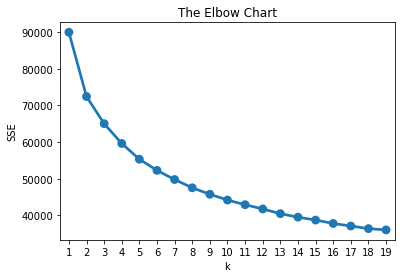

In [17]:
sse = {}
for k in range(1, 20):   
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=654)
    # Fit KMeans on the normalized dataset
    kmeans.fit(scaled_df)
    sse[k] = kmeans.inertia_

plt.title('The Elbow Chart')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()));

In [18]:
agg_dic = {'square_foot': 'mean',
'household_income': 'mean',
'number_pets': 'mean',
'entertainment_spend_est': 'mean',
'travel_spend_est': 'mean',
'under_12': ['mean', 'count']}

### Choosing best k

In [19]:
clustering_df.describe()

,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est,under_12
count,14991.000000,14991.000000,14991.000000,14991.000000,14991.000000,14991.000000
mean,3118.887399,84674.467985,1.509172,3453.907336,3943.693201,1.582683
std,815.838354,25746.804595,0.790305,1226.175239,744.571287,0.813711
min,370.000000,-3078.560000,0.000000,9.430000,1037.610000,0.000000
25%,2506.000000,66804.780000,1.000000,2594.940000,3456.315000,1.000000
50%,3042.000000,84305.900000,2.000000,3391.700000,3959.650000,2.000000
75%,3737.000000,102646.990000,2.000000,4279.575000,4442.080000,2.000000
max,6081.000000,171989.560000,4.000000,7942.620000,7014.070000,4.000000


In [20]:
kmeans = KMeans(n_clusters=4, random_state=654)
kmeans.fit(scaled_df)
cluster_labels = kmeans.labels_

kmeans4 = scaled_df.assign(Cluster = cluster_labels)
kmeans4.groupby(['Cluster']).agg(agg_dic).round(2)

square_foot household_income number_pets entertainment_spend_est  \
               mean             mean        mean                    mean   
Cluster                                                                    
0             -0.32             0.37       -0.06                    0.22   
1              0.04             0.94       -0.00                    1.06   
2             -0.60            -0.75       -0.01                   -0.66   
3              1.05            -0.36        0.07                   -0.42   

        travel_spend_est under_12        
                    mean     mean count  
Cluster                                  
0                   0.12    -1.13  3620  
1                   0.54     0.50  3447  
2                  -0.87     0.39  4414  
3                   0.43     0.19  3510

In [21]:
kmeans = KMeans(n_clusters=5, random_state=654)
kmeans.fit(scaled_df)
cluster_labels = kmeans.labels_

kmeans5 = scaled_df.assign(Cluster = cluster_labels)
kmeans5.groupby(['Cluster']).agg(agg_dic).round(2)

square_foot household_income number_pets entertainment_spend_est  \
               mean             mean        mean                    mean   
Cluster                                                                    
0              1.19            -0.22        0.01                   -0.30   
1              0.09             1.01       -0.02                    1.14   
2             -0.34             0.51       -0.05                    0.35   
3             -0.43            -0.62        0.95                   -0.58   
4             -0.47            -0.66       -0.93                   -0.58   

        travel_spend_est under_12        
                    mean     mean count  
Cluster                                  
0                   0.61     0.05  2967  
1                   0.58     0.56  2874  
2                   0.19    -1.16  3145  
3                  -0.67     0.33  3076  
4                  -0.69     0.30  2929

In [22]:
kmeans = KMeans(n_clusters=6, random_state=654)
kmeans.fit(scaled_df)
cluster_labels = kmeans.labels_

kmeans6 = scaled_df.assign(Cluster = cluster_labels)
kmeans6.groupby(['Cluster']).agg(agg_dic).round(2)

square_foot household_income number_pets entertainment_spend_est  \
               mean             mean        mean                    mean   
Cluster                                                                    
0              0.71            -0.42        1.03                   -0.48   
1              0.88             1.04       -0.08                    1.07   
2             -0.59             0.43        0.01                    0.30   
3             -0.65            -0.96       -0.07                   -0.84   
4              0.67            -0.40       -1.00                   -0.43   
5             -0.72             0.53        0.08                    0.62   

        travel_spend_est under_12        
                    mean     mean count  
Cluster                                  
0                   0.20     0.16  2462  
1                   0.94    -0.10  2143  
2                   0.01    -1.13  2899  
3                  -1.16     0.25  2825  
4                   0.29     0.15  2368  
5                   0.03     0.89  2294

In [23]:
kmeans = KMeans(n_clusters=7, random_state=654)
kmeans.fit(scaled_df)
cluster_labels = kmeans.labels_

kmeans7 = scaled_df.assign(Cluster = cluster_labels)
kmeans7.groupby(['Cluster']).agg(agg_dic).round(2)

square_foot household_income number_pets entertainment_spend_est  \
               mean             mean        mean                    mean   
Cluster                                                                    
0             -0.42             0.40       -0.97                    0.28   
1             -0.70             0.56        0.15                    0.66   
2             -0.70            -0.96       -0.07                   -0.84   
3              0.73            -0.49       -0.93                   -0.51   
4             -0.41             0.31        0.91                    0.17   
5              0.78            -0.52        0.98                   -0.56   
6              0.96             1.01       -0.05                    1.05   

        travel_spend_est under_12        
                    mean     mean count  
Cluster                                  
0                   0.07    -1.00  1994  
1                   0.04     0.87  2228  
2                  -1.18     0.27  2638  
3                   0.26     0.34  2090  
4                   0.05    -1.05  1978  
5                   0.15     0.38  2084  
6                   0.97    -0.03  1979

After analyzing the summary statistics for the different cluster, we have decided to build **5** clusters. When we increased k from 4 to 5, more variation was observed along the number_pets variable which suggests that 4 clusters were too less. For k= 6, 7, we started noticing muliple clusters with similar properties. Hence we decided to go with 5 clusters. 

### 5 consumer segments

In [24]:
# building a k-means model with k=5
kmeans = KMeans(n_clusters=5, random_state=654)
kmeans.fit(scaled_df)
cluster_labels = kmeans.labels_

# attaching cluster labels to data
kmeans_final = df2.assign(Cluster = cluster_labels)

In [25]:
kmeans_final.head()

,own_rent,square_foot,household_income,number_pets,region,entertainment_spend_est,travel_spend_est,under_12,LL_passholder,Cluster
0,own,3309,82050.03,1,South Shore,3189.11,3083.41,1.0,Yes,4
1,own,3814,83077.81,2,MetroWest,4175.35,4713.28,1.0,Yes,0
2,rent,2592,91401.41,2,North Shore,1814.98,3479.07,2.0,No,3
3,own,2628,73048.55,1,Middlesex,1945.14,3842.42,1.0,No,4
4,rent,2442,89145.36,2,Suffolk,4410.86,1913.28,1.0,Yes,3


In [26]:
kmeans_final['Cluster'] = pd.Categorical(kmeans_final['Cluster'])
kmeans_final['expenditure'] = kmeans_final['entertainment_spend_est'] + kmeans_final['travel_spend_est']

**Consumer Segment Descriptions**

Cluster 0 - **White Picket Fence Families**

This seems to be a typical American family that paints a White Picket Fence-esque picture. This is a household with 1 to 2 kids below the age of 12.  They have between 1 and 2 pets and reside in a large house, probably with a pool and/or yard. This could be an ancestral home or passed down by their parents. 

They are also big spenders when it comes to travelling throughout the year. This can be attributed to the fact that kids below the age of 12 may need more accommodations or have travel scheduled around their school year. Their entertainment expenditure is at an average, and they have an average income, maybe one of the parents is stay-at-home or there are single parents in this cluster. 
 
Cluster 1 - **The McModern Dream**

This is a high income household (possibly dual), living in large houses. The houses based on square feet could be 2 storied 4 bedroom houses, or the McModern houses which are taking over from the McMansions and mostly in the MetroWest area.  This household is a busy one with 1 to 3 kids below the age of 12 and at least one pet!

The families in this cluster seem to be living well, with lavish spending on entertainment and travel! The reasons for that could also be that they have the income to keep the kids entertained, especially if both the parents are working and tend to enjoy their vacations.

Cluster 2 - **Double Income No Kids**

This seems to be a household living their best life! They are high earners, could be a single person household or a dual income household. They live in large 2 to 3 bedroom apartments or townhouses mainly in Suffolk. They have 1 or 2 pets, and mostly no kids under 12.

This is a household that spends equally on travel and entertainment. We could assume they are young professionals enjoying their time and freedom.

Cluster 3 - **Fuller House**

Here we see a possibly large family with an average income, maybe a stay-at-home parent, living in idyllic row houses or 3 bedroom apartments.
This is a very busy family with 1 or 2 kids under the age of 12. There could be older kids in this household too. These households have the most number of pets (between 2 and 3). They are heavily located in the North Shore, South Shore and Middlesex area, which has good public and private schools.  

The spending of these households is low for entertainment and average for traveling. These families live in  areas that are very close to travel to places like New Hampshire or Cape Cod for long weekends. It could also be that with 2 or more pets, the families simply do not travel a lot.
 
Cluster 4 - **Full House**

This household is a large family household, with 1 to 2 kids and one or no pets. They share a lot of similarities with cluster 3. They are heavily located in the North Shore, South Shore and Middlesex area, which has good public and private schools.  

The spending of these households is low for entertainment and average for traveling. This could be because the regions this household primarily resides in are less metropolitan to spend on entertainment, especially for younger kids. Also, their area is very close to travel to places like New Hampshire or Cape Cod for long weekends.


**Consumer Segment Targeting Strategies**

**White Picket Fence Families** - Lobster Land can effectively market to this family since they seem to enjoy spending on traveling, they can be targeted with some “all-in-one place” activities. With kids possibly finishing up the school year, they are prime candidates to visit this festival as a whole family. 

**The McModern Dream** - We can see that these families are indulgent and tend to enjoy their vacations, so Lobster Land can market to them some of the higher tiered priced activities. They are also more likely to spend on food and kid-friendly activities to keep the kids entertained.

**Double Income No Kids** - This is a group that can be targeted with versatile options. From portraying the event as a romantic getaway to a nice weekend trip with their group of friends, the marketing angle for this can be ‘Fun’, ‘Exciting’, or even long awaited time-off from the dreaded work-from-home grind.

**Fuller House** - This is a family which definitely needs a vacation with multiple kids and pets, and probably a busy school year. They are not big spenders or high earners, so the targeting for this can be more along the lines of enjoying the start of summer after a hectic year with fun activities for the whole family.

**Full House** - Here we have a similar background as the Fuller House families, with the exception of multiple pets. Lobster Land can target these families similarly, though more aggressively since we could assume that due to the lack of pets (and worrying about pet sitters), these families have more leeway to travel.


In [54]:
# renaming the clusters with the segment names 
segment_names = {0: "White Picket Fence",
                 1: "McModern Dream",
                 2: "Double Income No Kids",
                 3: "Fuller House",
                 4: "Full House"}

kmeans_final['Consumer Segment'] = kmeans_final['Cluster']
kmeans_final['Consumer Segment'].replace(segment_names, inplace=True)

### Cluster Visualizations

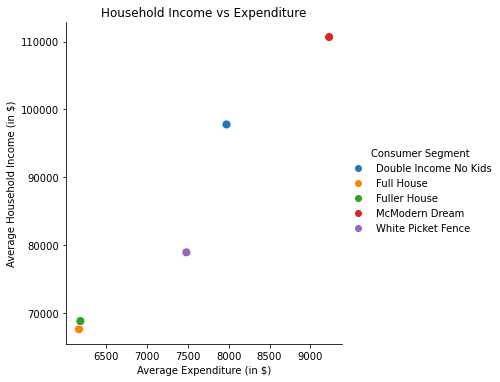

In [55]:
kmeans_grouped = kmeans_final.groupby('Consumer Segment')[numeric_cols + ['expenditure']].mean()
sns.relplot(x="expenditure", y="household_income", hue='Consumer Segment',
            data=kmeans_grouped, s=80)

plt.title("Household Income vs Expenditure");
plt.xlabel("Average Expenditure (in $)");
plt.ylabel("Average Household Income (in $)");

This graph shows us the average household income vs average travel and entertainment expenditure for the different consumer segments. We can see a linear relationship between these 2 variables, with McModern Dream segment having the highest income and spending lavishly on travel and entertainment. The Full House and Fuller House segments are on the other end of the spectrum.

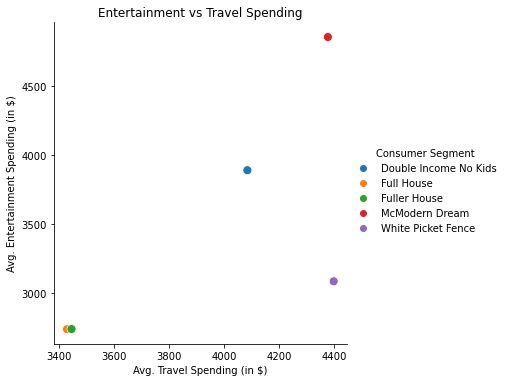

In [56]:
sns.relplot(x="travel_spend_est", y="entertainment_spend_est", hue='Consumer Segment', data=kmeans_grouped, s=80)

plt.title("Entertainment vs Travel Spending");
plt.xlabel("Avg. Travel Spending (in $)");
plt.ylabel("Avg. Entertainment Spending (in $)");

This graph shows us the relationship between entertainmnet and travel spending in the different segments. The White Picket Fence segments pends a lot more on travel than entertainment. In case of the other four segments, travel and entertainment spending is pretty equal.

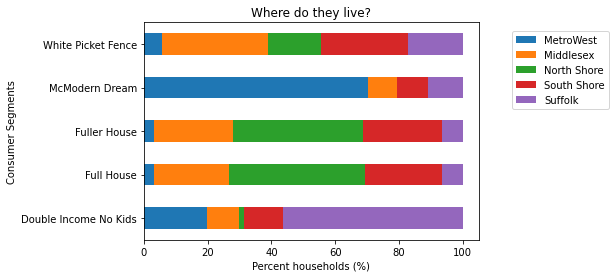

In [57]:
CrosstabResult=pd.crosstab(index=kmeans_final['Consumer Segment'],columns=kmeans_final['region'])

stacked_data = CrosstabResult.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="barh", stacked=True);
plt.title("Where do they live?");
plt.ylabel("Consumer Segments");
plt.xlabel("Percent households (%)");
plt.legend( loc = (1.1,0.6));

This graph shows us where in Greater Boston can we find households from the different segments. The 'Double Income No Kids' segment predominently resides in Suffolk, 'McDream House' segment predominently resides MetroWest, 'White Picket Fence' can be found in Middlesex and South Shore. 'Full House' and 'Fuller House' segments have a very geographic makeup, with them mainly residing in North Shore.

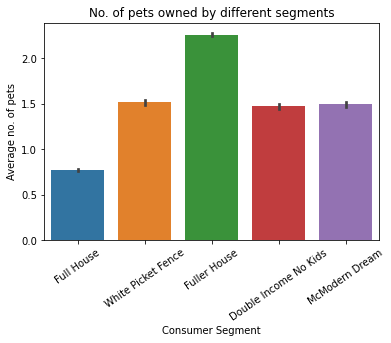

In [58]:
sns.barplot(x='Consumer Segment', y="number_pets", data=kmeans_final);
plt.ylabel('Average no. of pets');
plt.title('No. of pets owned by different segments');
plt.xticks(rotation=35);

This graph shows us the pets owned by the different segmnets. This graph highlights the main distinction between The Full House and Fuller House segments, with Fuller House owning the most and Full House the least no. of pets.

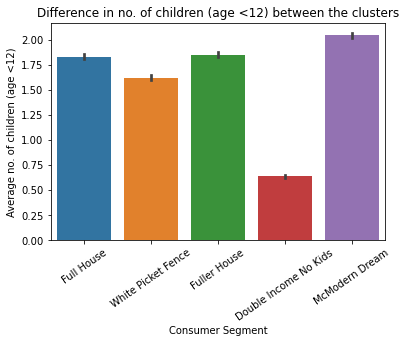

In [59]:
sns.barplot(x='Consumer Segment', y="under_12", data=kmeans_final);
plt.ylabel('Average no. of children (age <12)');
plt.title('Difference in no. of children (age <12) between the clusters');
plt.xticks(rotation=35);

This graph shows us the no. of members in a houshold below 12. The Double Income No Pets segments have the least kids compared to the rest. 

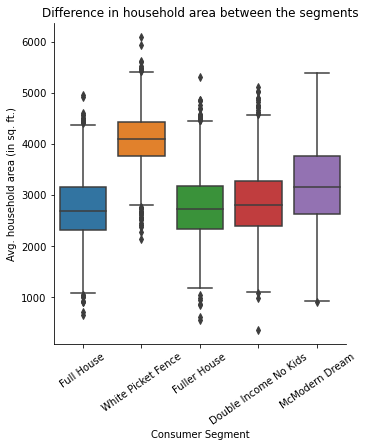

In [61]:
sns.catplot(x='Consumer Segment', y="square_foot", kind="box", data=kmeans_final)
plt.ylabel('Avg. household area (in sq. ft.)');
plt.title('Difference in household area between the segments');
plt.xticks(rotation=35);

This graph shows us the average household area across the segments. The White Picket Fence segment has the largest size homes compared to the other segments. 